In [2]:
import pandas as pd
import matplotlib.pyplot as plt

The Goal of this Project is to show how tastes in gaming change with age and to show what age group has more time or can find more time to enjoy themselves with video games!
We are using two different sets of data including a survey conducted between Men and Women of varying ages to see how much time and when they sit down to play games. 

In [3]:
Original_gaming_survey = pd.read_csv('Updated_Gaming_Survey_Responses(Sheet1).csv')
Original_gaming_survey

,Timestamp,Age,Gender,Location,How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),...,Why do you play video games? (Check all that apply),How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),Do you prefer single-player or multiplayer games?,"How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?",Why do you play video games? (Check all that apply)
0,2024-10-24 13:09:27,18,Male,Bangalore,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-24 13:09:34,19,Male,"Hell road , Bangalore",Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-24 13:23:13,19,Male,Bangalore,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-24 13:30:42,18,Female,Banglore,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-24 13:32:27,18,Female,"Banglore, Karnataka",Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-10-25 16:55:00,19,Male,Florida,Rarely/Never,5-10 hours,PC,Puzzle/Strategy,Subway,Social Media,...,"To socialize, For fun/entertainment",Daily,Less than 5 hours,All,Role-playing,Minecraft,Gaming Forums,Multiplayer,?100-500,For the story/experience
496,2024-10-25 16:56:00,16,Female,Florida,Daily,10-20 hours,"Console (PlayStation, Xbox, etc.)","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,To relieve stress,Weekly,5-10 hours,"Console (PlayStation, Xbox, etc.)",Simulation,Overwatch,Social Media,Multiplayer,More than ?1000,For the story/experience
497,2024-10-25 16:57:00,30,Male,Ohio,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Sports,Efootball,Social Media,...,"To socialize, To improve skills/competition, F...",Daily,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Casual,Genshin Impact,Gaming Forums,Multiplayer,Less than ?100,For the story/experience
498,2024-10-25 16:58:00,19,Male,Ohio,Daily,More than 20 hours,PC,"Action/Adventure, First-Person Shooter (FPS), ...",Call of duty,"Social Media, Gaming Forums, Game Reviews/Blog...",...,"To improve skills/competition, To socialize",Rarely/Never,5-10 hours,"PC, Mobile",Action/Adventure,Among Us,Friends/Family Recommendations,Single-player,?100-500,For fun/entertainment


In [4]:
original_sales_data = pd.read_csv('Video Game Sales 1978 - 2024 export 2025-07-15 22-06-38.csv')
original_sales_data

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
0,1,Tetris,Series,NaN,Tetris (1984)|Tetris (1989)|Welltris|Hatris|Tw...,The Tetris Company,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,Puzzle
1,2,Pokemon,Series,NaN,Pokemon Red & Green (Japan-only) & Blue|Pokemo...,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Role-Playing
2,3,Call of Duty,Series,NaN,Call of Duty|Call of Duty 2|Call of Duty 3|Cal...,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,Shooter
3,4,Grand Theft Auto,Series,NaN,Grand Theft Auto|Grand Theft Auto: London 1969...,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Action-Adventure
4,5,Super Mario,Series,NaN,Mario Bros.|Super Mario Bros.|Super Mario Bros...,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63922,63923,Zombieland: Double Tap - Road Trip,PC,NaN,NaN,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Shooter
63923,63924,Zombillie,NS,NaN,NaN,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Puzzle
63924,63925,Zone of the Enders: The 2nd Runner MARS,PC,NaN,NaN,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Simulation
63925,63926,Zoo Tycoon: Ultimate Animal Collection,XOne,NaN,NaN,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Simulation


In [5]:
Original_gaming_survey_cleaned = Original_gaming_survey.dropna()
Original_gaming_survey_cleaned

,Timestamp,Age,Gender,Location,How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),...,Why do you play video games? (Check all that apply),How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),Do you prefer single-player or multiplayer games?,"How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?",Why do you play video games? (Check all that apply)
200,2024-10-25 12:00:00,26,Female,Florida,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",Daily,5-10 hours,"PC, Console",Simulation,Genshin Impact,Friends/Family Recommendations,Single-player,?500-1000,For fun/entertainment
201,2024-10-25 12:01:00,17,Male,London,Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,Daily,Less than 5 hours,"PC, Mobile",First-Person Shooter (FPS),Genshin Impact,Gaming Forums,Multiplayer,?500-1000,To socialize
202,2024-10-25 12:02:00,18,Male,Ohio,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,Rarely/Never,10-20 hours,All,Puzzle/Strategy,League of Legends,Friends/Family Recommendations,Single-player,?500-1000,To socialize
203,2024-10-25 12:03:00,18,Male,Florida,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,Weekly,Less than 5 hours,"Console (PlayStation, Xbox, etc.)",Action/Adventure,FIFA 2024,Gaming Forums,Both,Less than ?100,For the story/experience
204,2024-10-25 12:04:00,20,Female,London,Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",Weekly,More than 20 hours,"PC, Mobile",Casual,Overwatch,Social Media,Both,?100-500,To socialize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-10-25 16:55:00,19,Male,Florida,Rarely/Never,5-10 hours,PC,Puzzle/Strategy,Subway,Social Media,...,"To socialize, For fun/entertainment",Daily,Less than 5 hours,All,Role-playing,Minecraft,Gaming Forums,Multiplayer,?100-500,For the story/experience
496,2024-10-25 16:56:00,16,Female,Florida,Daily,10-20 hours,"Console (PlayStation, Xbox, etc.)","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,To relieve stress,Weekly,5-10 hours,"Console (PlayStation, Xbox, etc.)",Simulation,Overwatch,Social Media,Multiplayer,More than ?1000,For the story/experience
497,2024-10-25 16:57:00,30,Male,Ohio,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Sports,Efootball,Social Media,...,"To socialize, To improve skills/competition, F...",Daily,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Casual,Genshin Impact,Gaming Forums,Multiplayer,Less than ?100,For the story/experience
498,2024-10-25 16:58:00,19,Male,Ohio,Daily,More than 20 hours,PC,"Action/Adventure, First-Person Shooter (FPS), ...",Call of duty,"Social Media, Gaming Forums, Game Reviews/Blog...",...,"To improve skills/competition, To socialize",Rarely/Never,5-10 hours,"PC, Mobile",Action/Adventure,Among Us,Friends/Family Recommendations,Single-player,?100-500,For fun/entertainment


In [6]:
original_sales_data_cleaned = original_sales_data.dropna(axis=1)
original_sales_data_cleaned

,Rank,Name,Platform,Publisher,Developer,Genre
0,1,Tetris,Series,The Tetris Company,Alexey Pajitnov,Puzzle
1,2,Pokemon,Series,Nintendo,Game Freak,Role-Playing
2,3,Call of Duty,Series,Activision,Infinity Ward,Shooter
3,4,Grand Theft Auto,Series,Rockstar Games,Rockstar North,Action-Adventure
4,5,Super Mario,Series,Nintendo,Nintendo,Platform
...,...,...,...,...,...,...
63922,63923,Zombieland: Double Tap - Road Trip,PC,GameMill Entertainment,High Voltage Software,Shooter
63923,63924,Zombillie,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,Puzzle
63924,63925,Zone of the Enders: The 2nd Runner MARS,PC,Konami,Cygames,Simulation
63925,63926,Zoo Tycoon: Ultimate Animal Collection,XOne,Microsoft Studios,Frontier Developments,Simulation


In [7]:
#Merged_data = pd.merge(original_sales_data_cleaned, Original_gaming_survey_cleaned)
#print(Merged_data)

In [8]:
male_player = Original_gaming_survey_cleaned.query("Gender == 'Male'")
female_player = Original_gaming_survey_cleaned.query("Gender == 'Female'")
print(male_player)


               Timestamp  Age Gender  Location  \
201  2024-10-25 12:01:00   17   Male    London   
202  2024-10-25 12:02:00   18   Male      Ohio   
203  2024-10-25 12:03:00   18   Male   Florida   
205  2024-10-25 12:05:00   33   Male      Ohio   
206  2024-10-25 12:06:00   18   Male     Texas   
..                   ...  ...    ...       ...   
493  2024-10-25 16:53:00   21   Male  New York   
494  2024-10-25 16:54:00   32   Male  New York   
495  2024-10-25 16:55:00   19   Male   Florida   
497  2024-10-25 16:57:00   30   Male      Ohio   
498  2024-10-25 16:58:00   19   Male      Ohio   

      How often do you play video games?    \
201                           Rarely/Never   
202                           Rarely/Never   
203                           Rarely/Never   
205                  A few times in a week   
206                                  Daily   
..                                     ...   
493                     A few times a week   
494                            

In [9]:
female_player = Original_gaming_survey_cleaned.query("Gender == 'Female'")
print(female_player)

               Timestamp  Age  Gender    Location  \
200  2024-10-25 12:00:00   26  Female     Florida   
204  2024-10-25 12:04:00   20  Female      London   
210  2024-10-25 12:10:00   16  Female       Delhi   
213  2024-10-25 12:13:00   33  Female     Toronto   
214  2024-10-25 12:14:00   22  Female     Toronto   
..                   ...  ...     ...         ...   
484  2024-10-25 16:44:00   35  Female     Florida   
488  2024-10-25 16:48:00   26  Female  California   
491  2024-10-25 16:51:00   22  Female    New York   
496  2024-10-25 16:56:00   16  Female     Florida   
499  2024-10-25 16:59:00   19  Female     Toronto   

      How often do you play video games?    \
200                                  Daily   
204                                  Daily   
210                  A few times in a week   
213                                  Daily   
214                                  Daily   
..                                     ...   
484                                  Dail

In [10]:
Male_age = Original_gaming_survey_cleaned.query("Age < 40 and Gender == 'Male'")
print(Male_age)

               Timestamp  Age Gender  Location  \
201  2024-10-25 12:01:00   17   Male    London   
202  2024-10-25 12:02:00   18   Male      Ohio   
203  2024-10-25 12:03:00   18   Male   Florida   
205  2024-10-25 12:05:00   33   Male      Ohio   
206  2024-10-25 12:06:00   18   Male     Texas   
..                   ...  ...    ...       ...   
493  2024-10-25 16:53:00   21   Male  New York   
494  2024-10-25 16:54:00   32   Male  New York   
495  2024-10-25 16:55:00   19   Male   Florida   
497  2024-10-25 16:57:00   30   Male      Ohio   
498  2024-10-25 16:58:00   19   Male      Ohio   

      How often do you play video games?    \
201                           Rarely/Never   
202                           Rarely/Never   
203                           Rarely/Never   
205                  A few times in a week   
206                                  Daily   
..                                     ...   
493                     A few times a week   
494                            

In [11]:
Female_age = Original_gaming_survey_cleaned.query("Age < 40 and Gender == 'Female'")
print(Female_age)

               Timestamp  Age  Gender    Location  \
200  2024-10-25 12:00:00   26  Female     Florida   
204  2024-10-25 12:04:00   20  Female      London   
210  2024-10-25 12:10:00   16  Female       Delhi   
213  2024-10-25 12:13:00   33  Female     Toronto   
214  2024-10-25 12:14:00   22  Female     Toronto   
..                   ...  ...     ...         ...   
484  2024-10-25 16:44:00   35  Female     Florida   
488  2024-10-25 16:48:00   26  Female  California   
491  2024-10-25 16:51:00   22  Female    New York   
496  2024-10-25 16:56:00   16  Female     Florida   
499  2024-10-25 16:59:00   19  Female     Toronto   

      How often do you play video games?    \
200                                  Daily   
204                                  Daily   
210                  A few times in a week   
213                                  Daily   
214                                  Daily   
..                                     ...   
484                                  Dail

In [12]:
Common_game = Original_gaming_survey_cleaned['What genres of video games do you play? (Check all that apply)'].value_counts().idxmax()

print(Common_game)

Simulation


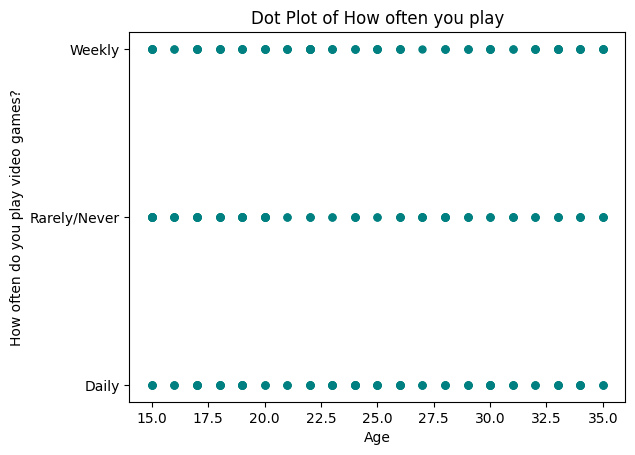

In [13]:
column_mean = Original_gaming_survey_cleaned['Age'].mean()
plt.plot(Original_gaming_survey_cleaned['Age'], Original_gaming_survey_cleaned['How often do you play video games?'], 'o', color='teal', markersize=5)
plt.title('Dot Plot of How often you play')
plt.xlabel('Age')
plt.ylabel('How often do you play video games?')
plt.show()

In [14]:
#original_sales_data_cleaned['How many hours do you typically spend gaming in a week?'].plot.bar(x='Category', y='values', color='green', legend=False)
#plt.title('Age of gamers')
#plt.ylabel('Values')
#plt.show()

In [25]:
sorted_survey = Original_gaming_survey_cleaned.sort_values(by='Age')
Favorite_genre_by_age = sorted_survey['What genres of video games do you play? (Check all that apply)'].mode()

print (Favorite_genre_by_age)

0    Action/Adventure
1          Simulation
Name: What genres of video games do you play? (Check all that apply), dtype: object
